In [4]:
import win32gui
import matplotlib.pyplot as plt
import numpy as np
import mss
import time
import cv2
from imutils import grab_contours

In [112]:
class Game:

    def __init__(self):
        self.hero_dealer = None
        self.pot_np = None
        self.hero_turn = None
        self.round = None
    
    def set_window_title(self, name):
        self.window_title = name

    def get_params(self):
        token_np = shot("hero_dealer")
        if token_np[0][0][0] > 200:
            print("hero dealer")
            self.hero_dealer = True
        else:
            print("hero not delaer")
            self.hero_dealer = False
        self.pot_np = shot("pot")

    def wait_for_hero_turn(self):
        while(True):
            time.sleep(1)
            state_1 = shot("hero_turn")
            if state_1[0][0][0] > 200:
                break    
            #print("waitng for hero turn...")

    def check_pot_change(self):
        POT_tmp = shot("pot")
        if not np.all(POT_tmp == self.pot_np):
            self.pot_np = POT_tmp
            return True
        else: return False
    
    def get_pot_img(self):
        return self.pot_np

    def test_loop(self):
        self.wait_for_hero_turn()
        self.get_params()
        i=0
        while(i<40):
            self.wait_for_hero_turn()
            print("hero_turn")
            if self.check_pot_change():
                print("\tpot changed")
            else:
                pass
                print("\tpot the same")
            i+=1
            


In [113]:
g1 = Game()

In [2]:
def winEnumHandler( hwnd, ctx ):
    global POKS_WINDOW
    if win32gui.IsWindowVisible( hwnd ):
        name = win32gui.GetWindowText( hwnd )
        print (name)
        if name.endswith('$'):
            POKS_WINDOW = name
            print("---found")

win32gui.EnumWindows( winEnumHandler, None )

In [118]:
g1.test_loop() # test activity on live game

hero not delaer
waitng for hero turn...
waitng for hero turn...
waitng for hero turn...
waitng for hero turn...
waitng for hero turn...
waitng for hero turn...
waitng for hero turn...
waitng for hero turn...
hero_turn
	pot changed
hero_turn
	pot the same
hero_turn
	pot the same
hero_turn
	pot the same
hero_turn
	pot the same
hero_turn
	pot the same
hero_turn
	pot the same
hero_turn
	pot changed
hero_turn
	pot the same
hero_turn
	pot the same
hero_turn
	pot the same
hero_turn
	pot the same
hero_turn
	pot the same
hero_turn
	pot the same
hero_turn
	pot the same
hero_turn
	pot the same
hero_turn
	pot the same
hero_turn
	pot the same
hero_turn
	pot the same
waitng for hero turn...
waitng for hero turn...
hero_turn
	pot changed
hero_turn
	pot the same
hero_turn
	pot the same
hero_turn
	pot the same
hero_turn
	pot the same
hero_turn
	pot the same
waitng for hero turn...
hero_turn
	pot changed
hero_turn
	pot the same
hero_turn
	pot the same
waitng for hero turn...
waitng for hero turn...
hero

In [8]:
LOC = [[180,197,300,530]]

In [17]:
LOC_t = [510, 700]
LOC_d = [363, 491]

In [9]:
# take screenshot only of specific area
def shot(location=None):
    window_title = "*new 6 - Notepad++"#
    if window_title:
        hwnd = win32gui.FindWindow(None, window_title)
        if hwnd:
            #win32gui.SetForegroundWindow(hwnd)
            x_b, y_b, x1, y1 = win32gui.GetWindowRect(hwnd)
            #print(x_b,y_b,x1,y1)
            if location == "pot":
                x, y = x_b+LOC[0][2], y_b+LOC[0][0]
                x1, y1 =  x_b+LOC[0][3], y_b+LOC[0][1]
            if location == "hero_dealer":
                x, y = x_b+LOC_d[1], y_b+LOC_d[0]
                x1, y1 =  x+1, y+1
            if location == "hero_turn":
                x, y = x_b+LOC_t[1], y_b+LOC_t[0]
                x1, y1 =  x+1, y+1

            #print(x,y,x1,y1)
            region = {'top': y, 'left': x, 'width': x1-x, 'height': y1-y}

            #print(region)
            img = mss.mss().grab(region)
            return np.array(img)
        else:
            print('Window not found!')

In [11]:
np_pot = shot("pot")

In [14]:
np_pot.shape

(17, 230, 4)

In [15]:
np_pot[0][0][0]

30

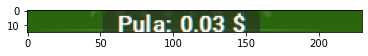

In [120]:
plt.imshow(g1.get_pot_img())